<a href="https://colab.research.google.com/github/SamiOmran/Prediction-of-Car-Insurance/blob/master/Prediction_of_Car_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#03fc62'>Project Title: Prediction of Car Insurance</font>

1.   `The dataset contains records for Insurance company for car owners, we need to predict the customers behavior.`

2.   `Target Column is Outcome: indicates 1 if a customer has claimed his/her loan else 0.`

3. `DUIS Column is: Driving under the influence.` [6 Types of DUIs](https://krvlegal.com/6-types-duis/2016/07/)

# <font color='#03fc62'>Load Data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download('sagnik1511/car-insurance-data')

print("Path to dataset files:", path)

100%|██████████| 222k/222k [00:00<00:00, 52.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sagnik1511/car-insurance-data/versions/1


In [3]:
import pandas as pd

df = pd.read_csv(path + '/Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

```
Data frame has the following:
1. 10000 entries
2. 19 columns
3. 11 numeric columns + 8 objects
4. missing values in: ANNUAL_MILEAGE + CREDIT_SCORE
```

# <font color='#03fc62'>Clean data

In [5]:
# check duplicates
df.duplicated().sum()

0

`No duplicates found in df`

In [6]:
# check inconsistancy values
cat_cols = df.select_dtypes('object')

for col in cat_cols:
  print(f'{col}: {df[col].unique()}')
  print('-'*30)

AGE: ['65+' '16-25' '26-39' '40-64']
------------------------------
GENDER: ['female' 'male']
------------------------------
RACE: ['majority' 'minority']
------------------------------
DRIVING_EXPERIENCE: ['0-9y' '10-19y' '20-29y' '30y+']
------------------------------
EDUCATION: ['high school' 'none' 'university']
------------------------------
INCOME: ['upper class' 'poverty' 'working class' 'middle class']
------------------------------
VEHICLE_YEAR: ['after 2015' 'before 2015']
------------------------------
VEHICLE_TYPE: ['sedan' 'sports car']
------------------------------


In [7]:
df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].str.replace('y', '')
df['DRIVING_EXPERIENCE'].value_counts()

,count
DRIVING_EXPERIENCE,
0-9,3530
10-19,3299
20-29,2119
30+,1052


In [8]:
df['DUIS'].value_counts()

,count
DUIS,
0,8118
1,1470
2,331
3,68
4,10
5,2
6,1


`Object columns are consistent`

In [9]:
# check numeric values
df.describe().loc[['min', 'max', 'mean', '50%']]

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
min,101.0000,0.053358,0.000,0.0000,0.0000,10238.0000,2000.000000,0.0000,0.0000,0.0000,0.0000
max,999976.0000,0.960819,1.000,1.0000,1.0000,92101.0000,22000.000000,22.0000,6.0000,15.0000,1.0000
mean,500521.9068,0.515813,0.697,0.4982,0.6888,19864.5484,11697.003207,1.4829,0.2392,1.0563,0.3133
50%,501777.0000,0.525033,1.000,0.0000,1.0000,10238.0000,12000.000000,0.0000,0.0000,0.0000,0.0000


`No wrong numeric values`

In [10]:
df['ID'].nunique()

10000

In [11]:
df = df.drop(columns=['ID'])

`ID is identical for each record so need for it`

# <font color='#03fc62'>EDA

## <font color='black-red'>Helpers

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate functions

In [13]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None, verbose = True):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100

  # fillna with placeholder
  if fillna:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order, hue = x)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f'Column: {x}')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  if verbose:
    # Print null value info
    print(f'- NaN\'s Found: {null_count} ({round(null_perc,2)}%)')
    # Print cardinality info
    nunique = temp_df[x].nunique()
    print(f'- Unique Values: {nunique}')
    # First find value counts of feature
    val_counts = temp_df[x].value_counts(dropna=False)
    # Define the most common value
    most_common_val = val_counts.index[0]
    # Define the frequency of the most common value
    freq = val_counts.values[0]
    # Calculate the percentage of the most common value
    perc_most_common = freq / len(temp_df) * 100
    # Print the results
    print(f'- Most common value: \'{most_common_val}\' occurs {freq} times ({round(perc_most_common,2)}%)')

    # print message if quasi-constant or constant (most common val more than 98% of data)
    if perc_most_common > 98:
      print(f'\n- [!] Warning: \'{x}\' is a constant or quasi-constant feature and should be dropped.')
    else:
      print('- Not constant or quasi-constant.')

  return fig, ax

In [14]:
def explore_numeric(df, x, figsize=(6,5), fig = None,
                    axes = None, verbose = True, color = None):
  '''Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  '''

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  median = round(df[x].median(), 2)

  if fig is None or axes is None:
    gridspec = {'height_ratios': [0.7, 0.3]}
    fig, axes = plt.subplots(nrows=2, figsize=figsize,
                              sharex=True, gridspec_kw=gridspec)

  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0], color=color)
  axes[0].axvline(median, color='gray', label=f'Median={median}')
  axes[0].legend()

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1], color=color)

  ## Adding a title
  axes[0].set_title(f'Column: {x}', fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout();

  if verbose:
    # Print null value info
    print(f'- NaN\'s Found: {null_count} ({round(null_perc,2)}%)')
    # Print cardinality info
    nunique = df[x].nunique()
    print(f'- Unique Values: {nunique}')


    # Get the most most common value, its count as # and as %
    most_common_val_count = df[x].value_counts(dropna=False).head(1)
    most_common_val = most_common_val_count.index[0]
    freq = most_common_val_count.values[0]
    perc_most_common = freq / len(df) * 100

    print(f'- Most common value: \'{most_common_val}\' occurs {freq} times ({round(perc_most_common,2)}%)')

    # print message if quasi-constant or constant (most common val more than 98% of data)
    if perc_most_common > 98:
      print(f'\n- [!] Warning: \'{x}\' is a constant or quasi-constant feature and should be dropped.')
    else:
      print('- Not constant or quasi-constant.')

  return fig, axes

### Multivariate

In [15]:
# Final version of function
def plot_categorical_vs_target(df, x, y = 'SalePrice', figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, hue = None, **kwargs):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()

  # fillna with placeholder
  if fillna:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset = [x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize = figsize)

    # Barplot
  sns.barplot(data = temp_df, x = x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None, hue=hue, **kwargs)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3, zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f'{x} vs. {y}')
  fig.tight_layout()

  return fig, ax

In [16]:
def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white', 'linewidths':1, 'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f'{x} vs. {y} (r = {r})')
  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## <font color='black-red'>Univariate

### Explore Numeric

In [17]:
colors = ['purple', 'blue', 'green', 'yellow', 'red']
num_cols = ['CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS']

numerical_cols = [(colors[i], num_cols[i]) for i in range(5)]

In [18]:
# fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# # Adding multiple plots to the figure
# for i, (color, feature) in enumerate(numerical_cols):
#   explore_numeric(df, feature, fig=fig, axes=axs[i // 2, i % 2])

# plt.tight_layout()
# plt.show()

In [19]:
# fig, axs = plt.subplots(3, 2, figsize=(10, 8), sharex='col')

# explore_numeric(df, 'CREDIT_SCORE', fig=fig, axes=[axs[0, 0], axs[1, 0]], verbose=False)
# explore_numeric(df, 'POSTAL_CODE', fig=fig, axes=[axs[0, 1], axs[1, 1]], color='green', verbose=False)

# plt.tight_layout()
# plt.show()

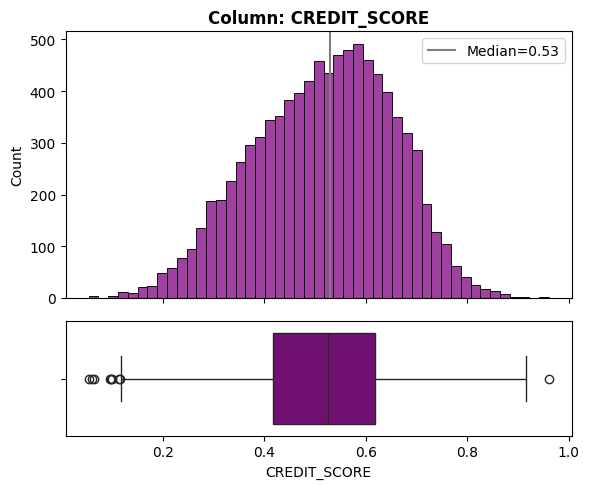

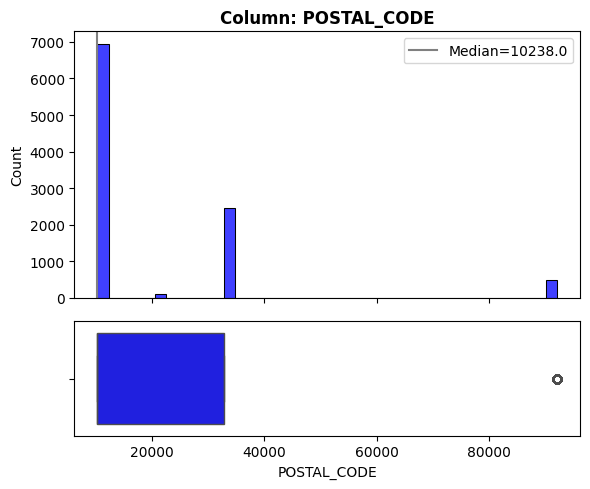

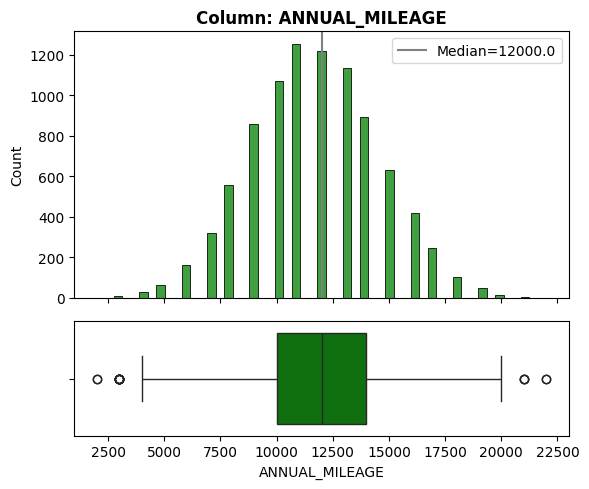

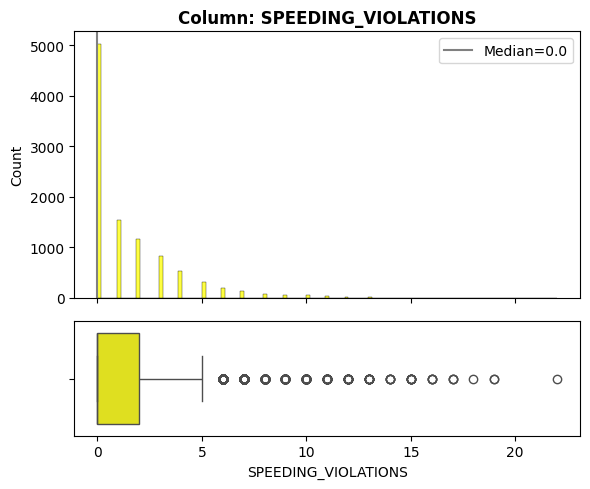

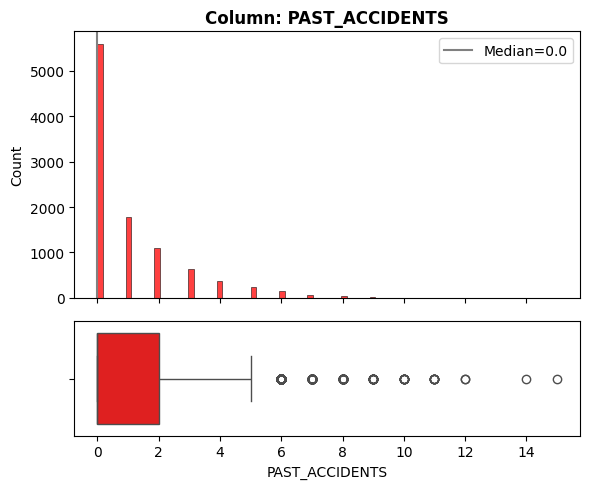

In [20]:
for color, feature in numerical_cols:
  explore_numeric(df, feature, color=color, verbose=False)

### Explore categorical

<ipython-input-13-8bcbcccee46b>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


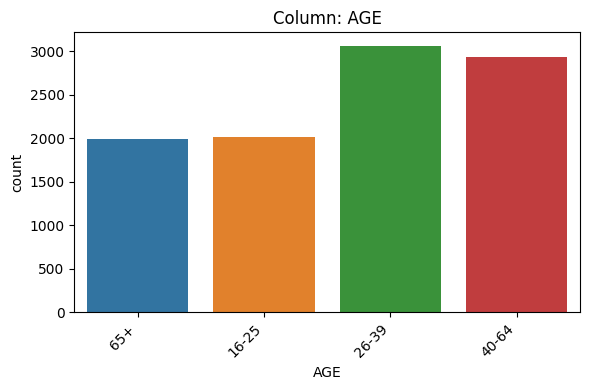

<ipython-input-13-8bcbcccee46b>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


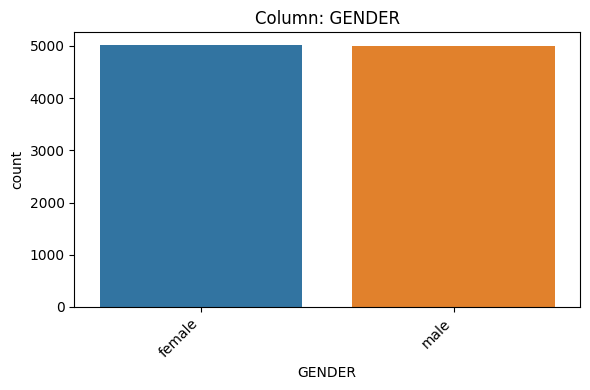

<ipython-input-13-8bcbcccee46b>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


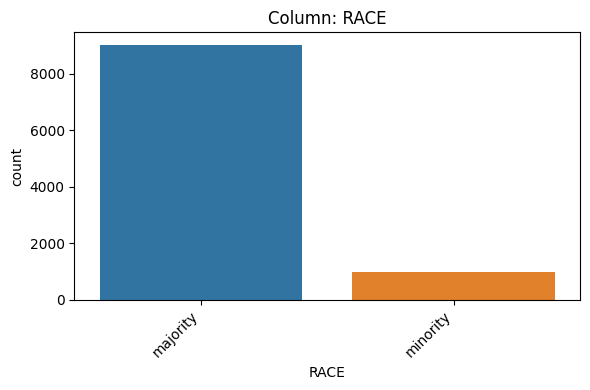

<ipython-input-13-8bcbcccee46b>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


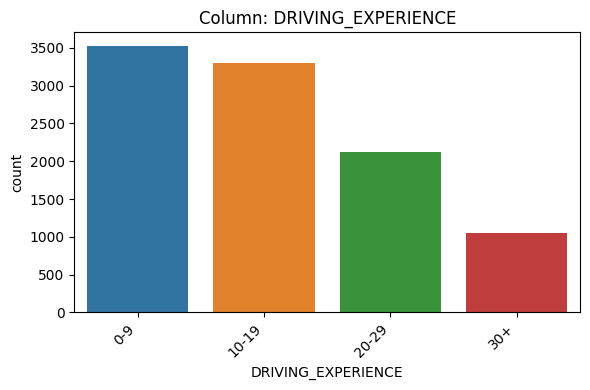

<ipython-input-13-8bcbcccee46b>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


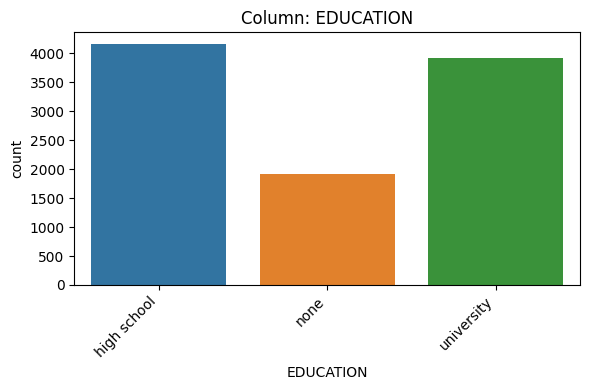

<ipython-input-13-8bcbcccee46b>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


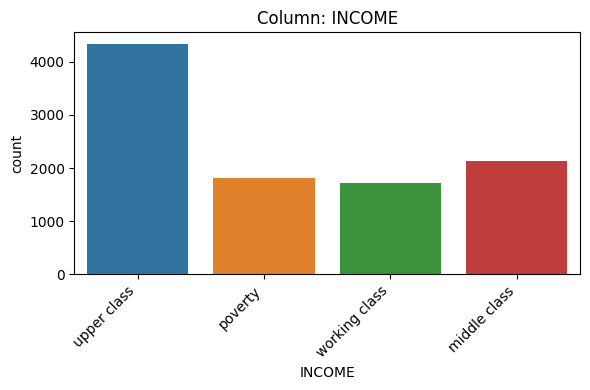

<ipython-input-13-8bcbcccee46b>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


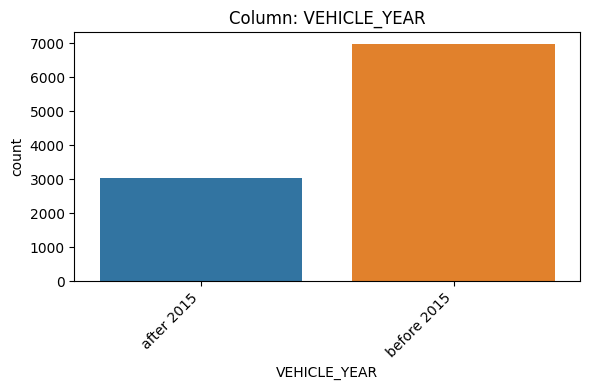

<ipython-input-13-8bcbcccee46b>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


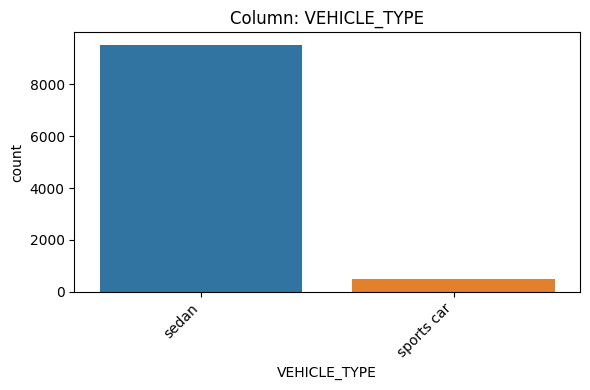

In [21]:
for col in df.select_dtypes('object').columns:
  explore_categorical(df, col, verbose = False)

## <font color='black-red'>Multivariate plots

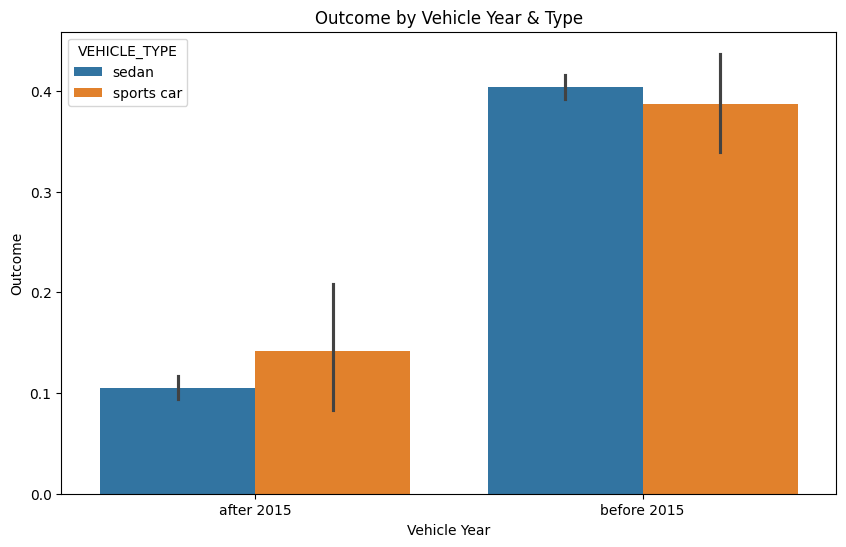

In [22]:
# plot vehicle_year and outcome
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='VEHICLE_YEAR', y='OUTCOME', hue='VEHICLE_TYPE')
plt.xlabel('Vehicle Year')
plt.ylabel('Outcome')
plt.title('Outcome by Vehicle Year & Type');
# plot_categorical_vs_target(df, y = 'OUTCOME', x = 'VEHICLE_YEAR', hue = 'VEHICLE_TYPE');

<ipython-input-15-3dcce55af60f>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


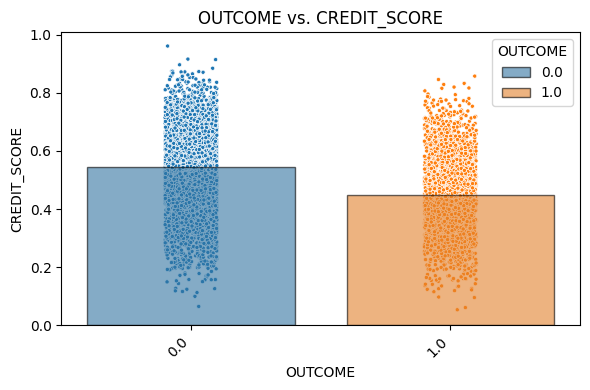

In [23]:
plot_categorical_vs_target(df, 'OUTCOME', 'CREDIT_SCORE', hue = 'OUTCOME');

<ipython-input-15-3dcce55af60f>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


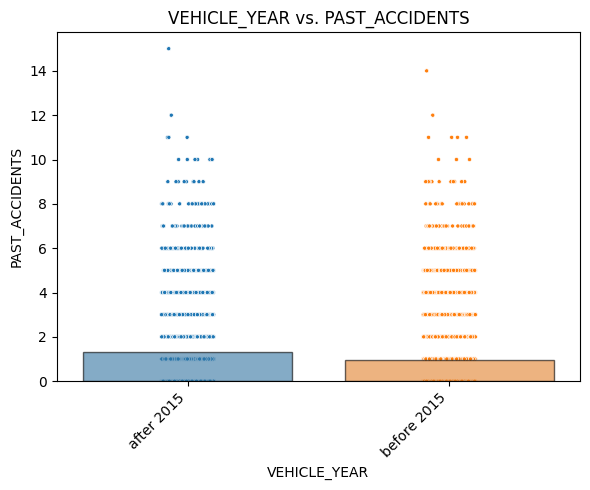

In [24]:
# past_accidents vs vehicle_year
plot_categorical_vs_target(df, y = 'PAST_ACCIDENTS', x = 'VEHICLE_YEAR', hue = 'VEHICLE_YEAR', figsize=(6, 5));

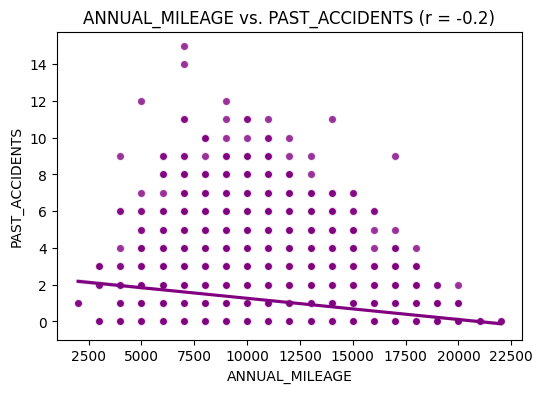

In [25]:
plot_numeric_vs_target(df, x = 'ANNUAL_MILEAGE', y = 'PAST_ACCIDENTS', color = 'purple');

<ipython-input-15-3dcce55af60f>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


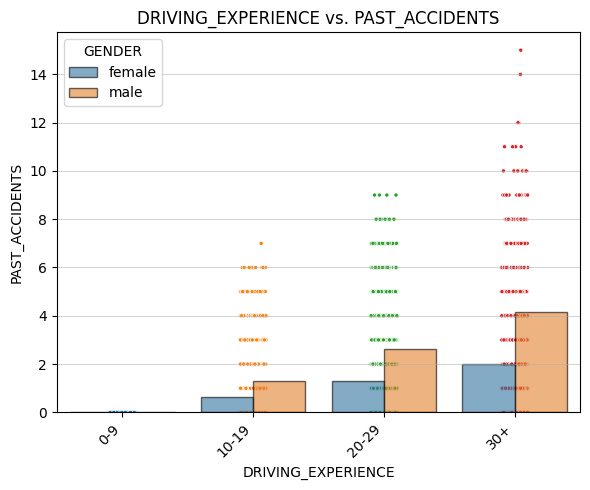

In [26]:
ax = plot_categorical_vs_target(df, hue = 'GENDER', y = 'PAST_ACCIDENTS', x = 'DRIVING_EXPERIENCE', figsize = (6, 5))[1];
ax.grid(axis='y', lw=0.4);

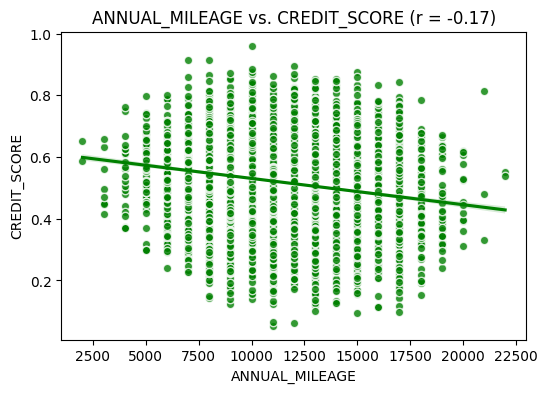

In [27]:
plot_numeric_vs_target(df, y = 'CREDIT_SCORE', x = 'ANNUAL_MILEAGE', color = 'green');

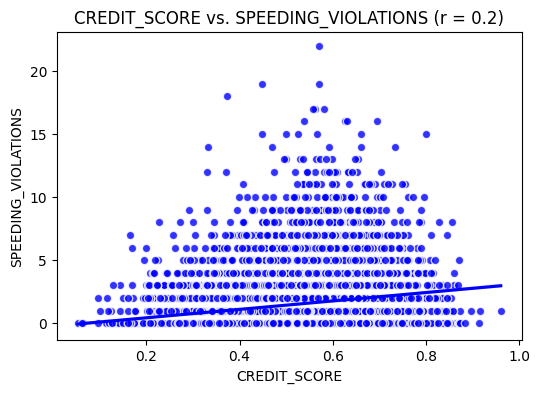

In [28]:
plot_numeric_vs_target(df, x = 'CREDIT_SCORE', y = 'SPEEDING_VIOLATIONS', color = 'blue');

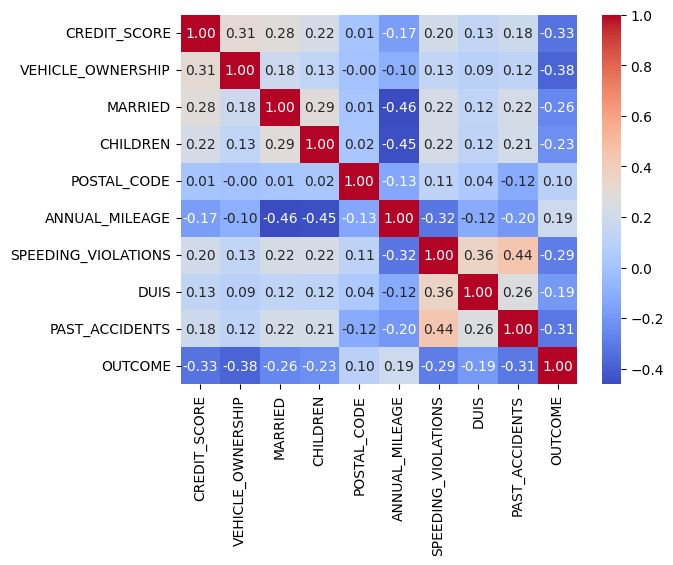

In [29]:
corr = df.corr(numeric_only=True)
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f');

# <font color='#03fc62'> Pre-Processing

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [31]:
from sklearn import set_config

set_config(transform_output = 'pandas')

In [32]:
# train_test split
y = df['OUTCOME']
X = df.drop(columns=['OUTCOME'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
# decalre numerical, ordinal and nominal columns
num_cols = X_train.select_dtypes('number').columns
ordinal_cols = ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME']
nominal_cols = X_train.select_dtypes('object').drop(columns = ordinal_cols).columns

In [34]:
X_train[num_cols].isna().sum()

,0
CREDIT_SCORE,745
VEHICLE_OWNERSHIP,0
MARRIED,0
CHILDREN,0
POSTAL_CODE,0
ANNUAL_MILEAGE,704
SPEEDING_VIOLATIONS,0
DUIS,0
PAST_ACCIDENTS,0


In [35]:
# numerical preprocess
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

num_pipeline = make_pipeline(impute_median, scaler)
num_tuple = ('numerical', num_pipeline, num_cols)

In [36]:
X_train[ordinal_cols].isna().sum()

,0
AGE,0
DRIVING_EXPERIENCE,0
EDUCATION,0
INCOME,0


In [37]:
for col in ordinal_cols:
  print(f'{col}: {X_train[col].unique()}')

AGE: ['40-64' '16-25' '26-39' '65+']
DRIVING_EXPERIENCE: ['0-9' '10-19' '20-29' '30+']
EDUCATION: ['high school' 'none' 'university']
INCOME: ['upper class' 'poverty' 'working class' 'middle class']


In [38]:
# ordinal preprocessing
age_order = ['16-25', '26-39', '40-64', '65+']
driving_exp_order = ['0-9', '10-19', '20-29', '30+']
education_order = ['none', 'high school', 'university']
income_order = ['poverty', 'working class', 'middle class', 'upper class']

orders = [age_order, driving_exp_order, education_order, income_order]
ord_encoder = OrdinalEncoder(categories = orders)

ord_tuple = ('ordinal', ord_encoder, ordinal_cols)

In [39]:
X_train[nominal_cols].isna().sum()

,0
GENDER,0
RACE,0
VEHICLE_YEAR,0
VEHICLE_TYPE,0


In [40]:
# nominal preprocessing
one_hot_encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop = 'if_binary')

nominal_tuple = ('nominal', one_hot_encoder, nominal_cols)

In [41]:
# declare column transformer
col_transformer = ColumnTransformer([num_tuple, ord_tuple, nominal_tuple], verbose_feature_names_out = False)
col_transformer

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['16...
                                                            ['0-9', '10-19',
                                                             '20-29', '30+'],
                                                            ['none',
                                                             'high school',
                                                             'university'],
                                                            ['poverty',
                                                             'working class',
                                                             'middle class',
                                                             'upper class']]),
                                 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION',
                                  'INCOME']),
                                ('nominal',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))],
                  verbose_feature_names_out=False)

In [42]:
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['16...
                                                            ['0-9', '10-19',
                                                             '20-29', '30+'],
                                                            ['none',
                                                             'high school',
                                                             'university'],
                                                            ['poverty',
                                                             'working class',
                                                             'middle class',
                                                             'upper class']]),
                                 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION',
                                  'INCOME']),
                                ('nominal',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))],
                  verbose_feature_names_out=False)

# <font color='#03fc62'> Modeling

## <font color='black-red'>Evaluation functions

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [44]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)

  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()

  # Return dictionary of classification_report
  if output_dict:
    report_dict = classification_report(y_true, y_pred, output_dict=True)

    return report_dict

In [45]:
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

## <font color='black-red'>KNN Model

In [50]:
# Use KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

n_neighbors = list(range(1, 31, 2))
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = [None, 'uniform', 'distance']

params = {
    'kneighborsclassifier__weights': weights,
    'kneighborsclassifier__n_neighbors': n_neighbors,
    'kneighborsclassifier__algorithm': algorithm,
}

In [51]:
y_train.value_counts(1)

,proportion
OUTCOME,
0.0,0.685867
1.0,0.314133


Balance data in 4 different ways and see which is better

1.   Oversampling
2.   Undertsampling
3.   SMOTE
4.   Class weights



In [52]:
# Oversampling
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# y_train_ros.value_counts(1)

In [53]:
# SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline

smote = SMOTE(random_state=42)
knn_smote_pipe = make_sampler_pipeline(col_transformer, smote, knn)

In [54]:
grid_search = GridSearchCV(knn_smote_pipe, param_grid=params, n_jobs=-1, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS']...
                                                          verbose_feature_names_out=False)),
                                       ('smote', SMOTE(random_state=42)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9,
                                                               11, 13, 15, 17,
                                                               19, 21, 23, 25,
                                                               27, 29],
                         'kneighborsclassifier__weights': [None, 'uniform',
                                                           'distance']},
             verbose=True)

In [55]:
def get_model_params(pipline, prefix):
  return {key: value for key, value in pipline.get_params().items() if key.startswith(prefix)}

In [56]:
best_model = grid_search.best_estimator_

get_model_params(best_model, 'kneighborsclassifier')

{'kneighborsclassifier': KNeighborsClassifier(algorithm='ball_tree', n_neighbors=23, weights='distance'),
 'kneighborsclassifier__algorithm': 'ball_tree',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 23,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'distance'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



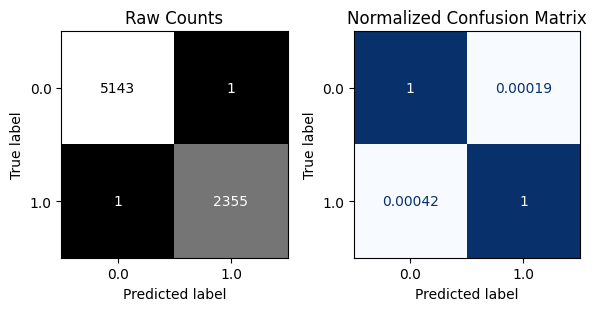


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      1723
         1.0       0.60      0.86      0.71       777

    accuracy                           0.78      2500
   macro avg       0.76      0.80      0.77      2500
weighted avg       0.82      0.78      0.79      2500



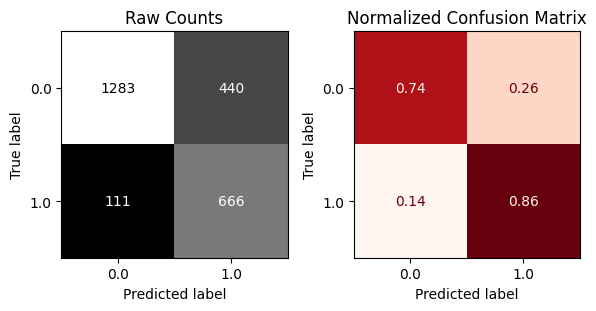

In [57]:
evaluate_classification(best_model, X_train, y_train, X_test, y_test)

# <font color='#03fc62'>Feature Importances + Visualizations

## <font color='black-red'>Helpers

In [46]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5),
                intercept=False, intercept_name="intercept",
                annotate=False, ha='left', va='center', size=12,
                xytext=(4,0), textcoords='offset points', colors = None):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)

    if not top_n:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)

        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"

    if colors:
      c = plot_vals.index.map(colors)

    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize, color = c)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)
    ax.axvline(0, color='k')

    if annotate:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)

    return ax

In [47]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

In [49]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}

    return colors_dict

## <font color='black-red'>Feature Importances

In [58]:
from sklearn.inspection import permutation_importance

permutation = permutation_importance(best_model, X_test, y_test, n_repeats = 5, random_state = 42)

In [59]:
knn_permutation_importances = pd.Series(permutation.importances_mean, index = X_test.columns).sort_values(ascending = False)
knn_permutation_importances.head()

,0
DRIVING_EXPERIENCE,0.03744
VEHICLE_OWNERSHIP,0.03240
VEHICLE_YEAR,0.01256
GENDER,0.01240
POSTAL_CODE,0.00808


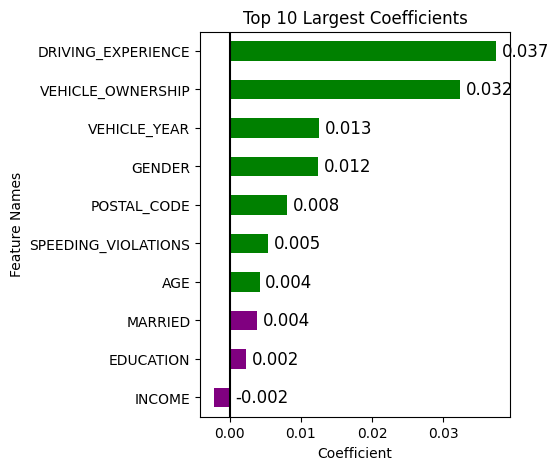

In [60]:
c = ['purple', 'blue', 'green', 'yellow', 'red']
colors = get_color_dict(knn_permutation_importances, color_top = 'green', color_rest = 'purple')

fig, ax = plt.subplots(figsize = (12, 10))

ax = plot_coeffs(knn_permutation_importances, 10, annotate = True, colors = colors);
fig.savefig('knn-permutation importances.png')

```


## <font color='black-red'> Visualization

<ipython-input-15-3dcce55af60f>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


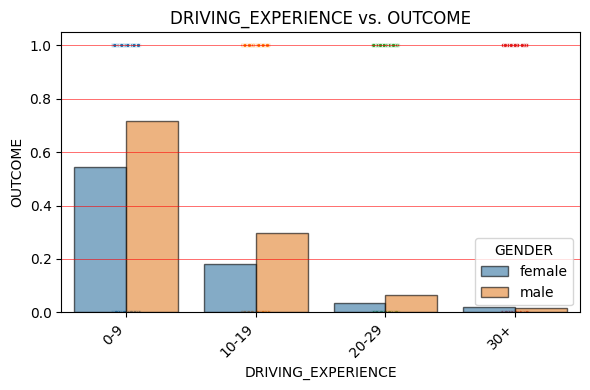

In [77]:
# Driving_experience vs Outcome
fig, ax = plot_categorical_vs_target(df, y = 'OUTCOME', x = 'DRIVING_EXPERIENCE', hue = 'GENDER');
ax.grid(axis='y', lw=0.4, color='red');

<ipython-input-15-3dcce55af60f>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


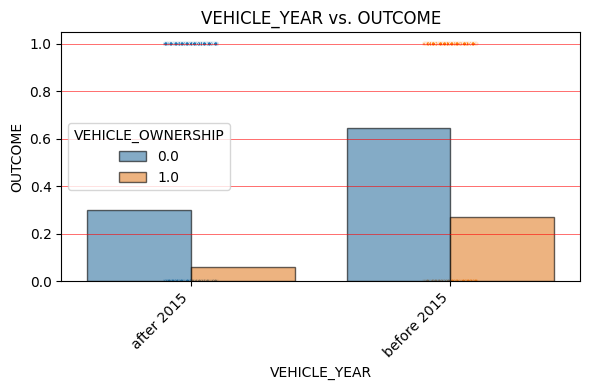

In [76]:
# Veichle_ownership vs Outcome
fig, ax = plot_categorical_vs_target(df, y = 'OUTCOME', x = 'VEHICLE_YEAR', hue = 'VEHICLE_OWNERSHIP');
ax.grid(axis='y', lw=0.4, color='red');